In [1]:
import pandas as pd
import os
# import lxml
# import DB as db

# graphs

In [ ]:
pd.to_datetime(df['log_date']).dt.date  
# pd.Timestamp(df['log_date'])
# x.dt.date
# x.week
# y

In [16]:
conn, cursor = db.open_db()
cmd = """
select * from 
(select dt, sum(line_no) '# logins' from log_stats where token = 'login True' group by dt)
left join
(select dt, sum(line_no) '# email quota errors' from log_stats where token = 'MailSendException' group by dt)
using (dt)
"""
df = pd.read_sql(cmd, conn)
cursor.close()


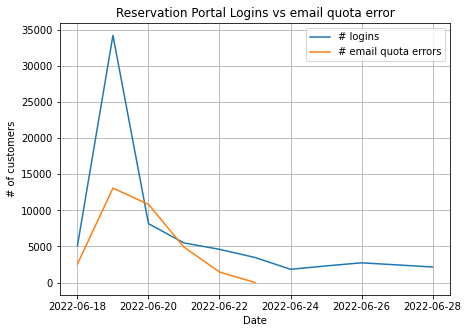

In [21]:
fig = df.plot(x='dt', y=['# logins', '# email quota errors'], title = 'Reservation Portal Logins vs email quota error', 
kind = 'line', 
grid=True,
xlabel = 'Date', ylabel = '# of customers', figsize = (7,5))#.get_figure()

# fig.savefig(r'.\out\email quota.jpg')

In [28]:
stats_all.columns

Index(['index', 'dt', 'token', 'categ', 'line_no'], dtype='object')

In [ ]:
logins = stats_all[stats_all.token == 'Login Success']
logins.rename({'line_no':'# logins'}, inplace= True)
emails_errors = stats_all[stats_all.token == 'MailSendException']
emails_errors.rename({'line_no':'# email sending failiure'}, inplace= True)
plt_data = pd.concat([logins, emails_errors], axis = 'columns', keys=['dt'])
plt_data
# plt_data.plot(x='dt')

In [ ]:
# stats
# stats = pd.DataFrame()
# stats = stats_all[['dt', 'line_no']]
# stats['login'] = 
# stats_all[['dt', 'line_no']].loc[[stats_all['token'] == 'Login Success']]
# stats_all[stats_all['token'] == 'Login Success']
# stats['eMail Send Quota'] = stats_all[stats_all.token == 'MailSendException']
# stats['dt'] = stats_all.dt
stats_all[stats_all.token == 'Login Success'].plot(x='dt', y='line_no')
stats_all[stats_all.token == 'MailSendException'].plot(x='dt', y='line_no')
# stats.plot(x='dt', y='line_no')
# stats


In [183]:
fn = r"C:\Yahia\Python\portal_logs\out\log data\2022-06-30_Reservation-Server-Log.csv"
df = pd.read_csv(fn, low_memory=False)


In [2]:
import lxml
cntry_html = pd.read_html('https://www.iban.com/country-codes')
cntry = cntry_html[0].iloc[:,[0,1]].to_csv('.\\data\\cntry.csv', index=False)
# cntry.to_csv(r'C:\Users\yahia\OneDrive - Data and Transaction Services\Python-data\PortalLogs\data\country.csv')

In [186]:
dts = df.dt.unique()
print (dts[0], dts[-1])

2022-06-18 2022-06-26


In [ ]:
x = df.loc[df.token =='Logins', ['country', 'line_no']][df.country != 'EG'].dropna().groupby(['country']).count()
y = x.join(cntry.set_index('Alpha-2 code'), how = 'left').sort_values(['line_no'], ascending = False).reset_index().drop(columns='country')
y

In [176]:
# df.loc[df.token.isin(['Logins']) & df.country == 'EG' ,['country', 'line_no']]#.count()
df.loc[df.token.isin(['Logins']) & df.country.isin(['EG']) ,['country', 'line_no']].count()

country    39714
line_no    39714
dtype: int64

<AxesSubplot:>

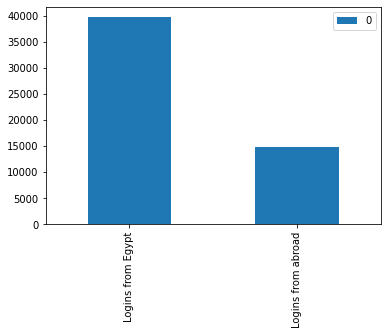

In [177]:
x_eg = df.loc[df.token.isin(['Logins']) & df.country.isin(['EG']) ,['country', 'line_no']].count()
x_out = df.loc[df.token.isin(['Logins']) & ~df.country.isin(['EG']) ,['country', 'line_no']].dropna().count()

lpd = pd.DataFrame([x_eg[0], x_out[0]], index=['Logins from Egypt', 'Logins from abroad'])
lpd.plot(kind='bar')

In [223]:
f = r"C:\Yahia\Python\portal_logs\out\log data\2022-06-30_06-09-2020.csv"
df  = pd.read_csv(f, low_memory=False)
# x = df[['token', 'dt', 'line_no']].loc[df.token.isin(['Logins', 'Failed Logins', 'MailSendException'])].groupby(['dt','token']).count().reset_index()
# x.pivot(index='dt', columns='token', values = 'line_no').plot(kind='bar')
# x.plot(x='dt')
# x
dfx = df[['dt', 'token', 'line_no']][df.categ == 'user'].groupby(['dt','token']).count().sort_values('line_no', ascending=False).rename(columns={'line_no':'Count'}).reset_index()
dfx = dfx.pivot(index='token', columns='dt', values = 'Count')
dfx

dt,2020-09-06
token,
Failed Logins,3207
Logins,27252
Logout,3802
MailSendException,1
UserNotFound,831
changeUserPassword,1
confirmLandReservation False,25
confirmLandReservation True,788
isReCAPTCHAValid,16


In [197]:
f = r"C:\Yahia\Python\portal_logs\out\log data\2022-06-30_06-09-2020.csv"
df  = pd.read_csv(f, low_memory=False)


In [205]:
x = df[['token', 'dt', 'line_no']].loc[df.token.isin(['Logins', 'Failed Logins', 'MailSendException'])].groupby(['dt','token']).count().reset_index()
# fig = x.pivot(index='dt', columns='token', values = 'line_no').plot()#.get_figure()
x

,dt,token,line_no
0,2020-09-06,Failed Logins,3207
1,2020-09-06,Logins,27252
2,2020-09-06,MailSendException,1


In [ ]:
df.rename (columns={'line_no':'Count'}, inplace = True)
df.country.fillna('not logged', inplace=True)
df.loc[df.token =='Logins', ['country', 'Count']].groupby(['country']).count().sort_values(by='Count', ascending= False )

<AxesSubplot:xlabel='dt'>

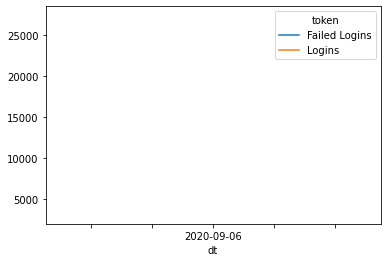

In [200]:
x = df[['token', 'dt', 'Count']].loc[df.token.isin(['Logins', 'Failed Logins'])].groupby(['dt','token']).count().reset_index()
x.pivot(index='dt', columns='token', values = 'Count').plot()

# dfx = df.loc[df.token =='MailSendException' & , ['country', 'Count']].groupby(['country']).count() 

# fig = df.plot(x='dt', y=['# logins', '# email quota errors'], title = 'Reservation Portal Logins vs email quota error', grid=True,
#             xlabel = 'Date', ylabel = '# of customers', figsize = (10,5)).get_figure()

In [24]:
x =['2022-07-01','2022-07-02', '2022-07-03', '2022-06-29', '2022-06-30']
# x =[1,2, 4]

x.sort(reverse=False)
x

['2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03']

In [21]:
cars = ['Ford', 'BMW', 'Volvo']

print (cars.sort(reverse=True))

None


In [8]:
x

['2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03']

In [ ]:
CSV_PATH = r'.\data\log csv'
log_files = []
for folder, subs, files in os.walk(CSV_PATH):
    for f in files: 
        if os.path.splitext(f) != 'csv':
            log_files.append(os.path.join(folder,f))
log_files

all_logs = pd.DataFrame()
for f in log_files:
    print (f)
    df = pd.read_csv(f, low_memory=False)
    all_logs = pd.concat([all_logs, df])




In [15]:
search_tokens = pd.read_csv(r"C:\Users\yahia\OneDrive - Data and Transaction Services\Python-data\PortalLogs\data\tokens.csv", na_values = 'null')

In [12]:
import plogs as logs
fpath = r"C:\Yahia\Python\portal_logs\data\test logs\2022-06-26\22-06.log"
logs.log_2_df(fpath).to_csv('.\\out\\xx.csv', index=False)

C:\Yahia\Python\portal_logs\data\test logs\2022-06-26\22-06.log
10000
20000
30000


In [4]:
df  = pd.read_csv('.\\out\\xx.csv')
df.columns

Index(['log_date', 'node', 'line_no', 'NID', 'log_type', 'country',
       'IP_address', 'service', 'token', 'categ', 'error_line'],
      dtype='object')

In [15]:
# df.fillna(0).pivot_table(columns=df.categ, index=df.token, values = df.error_line, aggfunc='count')
df.fillna(0).pivot_table(columns='categ', index='token', values = 'error_line', aggfunc='count', margins=True, fill_value=0)

categ,tech,user,All
token,,,
ControllerExceptionHandler,139,0,139
Email quota exception,0,1468,1468
Exception processing template,5718,0,5718
Failed Logins,0,5688,5688
HttpRequestMethodNotSupportedException,0,893,893
Logins,0,4609,4609
Logout,0,1237,1237
UserNotFound,0,1312,1312
[stderr] (default task-,160,0,160


# another summary

In [2]:
# filename = r"C:\Users\yahia\OneDrive - Data and Transaction Services\Python-data\PortalLogs\data\log summary-2022-08-07-to-2022-08-07.csv"
filename = r"C:\Users\yahia\Downloads\portal logs\log summary-2022-08-10-to-2022-08-10.csv"
df = pd.read_csv(filename)

In [ ]:
x = df.loc[df.token.isin(['Logins', 'Reservation']),['NID', 'token', 'dt']]
x = pd.pivot_table(x, index= 'NID', columns = 'token', values='dt', aggfunc='count').sort_values('Logins', ascending= False)
x['Reservation'] = x['Reservation'].fillna(0)
x = x.reset_index()
x.columns = ['NID', '# Logins', 'Reservation']  
# x.loc[x.Reservation == 1.0, ['Reservation']] = 'True'
x['# Logins'] = x['# Logins'].astype(int, errors = 'ignore')
# x.groupby('Reservation').sum()

##### test Login Frequency

In [ ]:
bins = [0, 10, 50, 100, 9999]
labels = ['1-10', '11-50', '51-100', '> 100']
x['bins'] = pd.cut(x['# Logins'], bins = bins, labels= labels)
stats = x.groupby('bins').sum()
# stats['NID'] = x.drop_duplicates('NID').groupby(['bins']).count()['NID']
x.drop_duplicates('NID').groupby(['bins']).count()['NID']
# stats = stats.reset_index()
# stats.columns = [' No of Logins per customer',  '# of Customers', 'Total # logins', '# of reservations']
# stats = stats.iloc[:,[3,0,1,2]] # relocate
# stats
# x

In [ ]:

x = df.loc[df.token.isin(['Logins', 'confirmLandReservation True']),['NID', 'token', 'dt']]
x = pd.pivot_table(x, index= 'NID', columns = 'token', values='dt', aggfunc='count').sort_values('Logins', ascending= False)
# x = x.groupby('NID').sum().reset_index()
y = x.groupby('Logins').sum().reset_index()
y
# x['f'] = 0
# def frq(x):
    
#     if x <= 10:
#         s =  '1 to 10'
#     elif x> 10 and x <= 50:
#         s = '11 to 50'
#     elif x> 50 and x <= 100:
#         s = '51 to 100'
#     else:
#         s =  '> 100'
#     # print (x,s)
#     return s

# x.f = x['dt'].apply(frq)
# x = x.groupby('f').sum().reset_index()
# x.columns = ['# Logins', 'x' ,'# of Customer']
# x.drop('x', axis='columns', inplace = True)
# x

# Reservation's customer journy

In [15]:
x = df.loc[df.token.isin(['confirmLandReservation True']), ['NID']]
x = df.loc[df.NID.isin(x.NID), ['NID','log_date', 'token' ]].sort_values(['NID', 'log_date'])
x

,NID,log_date,token
1401,25810302101732,2022-08-10 01:21:27,Logins
1435,25810302101732,2022-08-10 01:23:38,Logins
7318,25810302101732,2022-08-10 08:55:44,Logins
12144,25810302101732,2022-08-10 10:00:04,confirmLandReservation True
15130,25810302101732,2022-08-10 10:07:48,Logins
...,...,...,...
9603,29901142103903,2022-08-10 09:43:29,Logins
12143,29901142103903,2022-08-10 10:00:04,confirmLandReservation True
14741,29901142103903,2022-08-10 10:06:13,Logins
17746,29901142103903,2022-08-10 10:28:12,Logins
